In [1]:
#Importing required librarues

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("data/hypothyroid.csv")
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
#Create a copy for better practice
data = df.copy()

In [7]:
#Shape of the data
data.shape

(3772, 30)

In [8]:
# Display all Columns
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [9]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [10]:
#Checking for null values
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [11]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [15]:
data[data.duplicated()].head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
204,26,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
210,64,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
303,22,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
431,58,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
717,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
820,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
846,26,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
925,58,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
1017,57,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
1047,57,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative


In [16]:
#Checking for unique values in class column

data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [17]:
n = len(data[data['Class'] == 'secondary_hypothyroid'])
print("No of secondary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'primary_hypothyroid'])
print("No of primary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'compensated_hypothyroid'])
print("No of compensated_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n)

No of secondary_hypothyroid in Dataset: 2
No of primary_hypothyroid in Dataset: 95
No of compensated_hypothyroid in Dataset: 194
No of negative in Dataset: 3481


In [18]:
#For checking unique value of every column
for column in data.columns:
    print(column,'--->', (data[column].unique()))

age ---> ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex ---> ['F' 'M' '?']
on_thyroxine ---> ['f' 't']
query_on_thyroxine ---> ['f' 't']
on_antithyroid_medication ---> ['f' 't']
sick ---> ['f' 't']
pregnant ---> ['f' 't']
thyroid_surgery ---> ['f' 't']
I131_treatment ---> ['f' 't']
query_hypothyroid ---> ['f' 't']
query_hyperthyroid ---> ['f' 't']
lithium ---> ['f' 't']
goitre ---> ['f' 't']
tumor ---> ['f' 't']
hypopituitary ---> ['f' 't']
psych ---> ['f' 't']
TSH_measured ---> ['t' 'f']
TSH ---> ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' 

In [19]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured']

for col in col_name:
    print(f"No.of 'f' and 't' values are in {col} column")
    print(f"No.of f value in {col} column : {len(data[data[col] == 'f'])}")
    print(f"No.of t value in {col} column : {len(data[data[col] == 't'])}", '\n', '---'*20)

No.of 'f' and 't' values are in on_thyroxine column
No.of f value in on_thyroxine column : 3308
No.of t value in on_thyroxine column : 464 
 ------------------------------------------------------------
No.of 'f' and 't' values are in query_on_thyroxine column
No.of f value in query_on_thyroxine column : 3722
No.of t value in query_on_thyroxine column : 50 
 ------------------------------------------------------------
No.of 'f' and 't' values are in on_antithyroid_medication column
No.of f value in on_antithyroid_medication column : 3729
No.of t value in on_antithyroid_medication column : 43 
 ------------------------------------------------------------
No.of 'f' and 't' values are in sick column
No.of f value in sick column : 3625
No.of t value in sick column : 147 
 ------------------------------------------------------------
No.of 'f' and 't' values are in pregnant column
No.of f value in pregnant column : 3719
No.of t value in pregnant column : 53 
 ---------------------------------

In [20]:
#Checking for '?' value in our data which are null values 

data.isin(['?']).sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [21]:
# we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

data = data.drop(['TBG'], axis=1)

**Looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not.**

In [22]:
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


In [23]:
## Let's drop some unnecessary columns

data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [24]:
# Now let's replace the '?' values with nan value

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count!=0:
        data[col] = data[col].replace('?',np.nan)  

In [25]:
# For rechecking 

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count==0:
        print(col, data[col][data[col]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [26]:
#Now ? is replaced with nan value. so checking for null value
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [27]:
#Now checking for datatypes of columns

data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
FTI                          object
referral_source              object
Class                        object
dtype: object

#### **As the datatype of all columns are object, so first we've to convert them.**

In [28]:
# Mapping the categorical column

data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [32]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych',]

for col in col_name:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})

In [33]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


### **Encoding categorical columns**

In [34]:
#Unique values of referral_source column

data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [35]:
# using one-hot-encoding

data = pd.get_dummies(data, columns=['referral_source'], drop_first=True)

In [36]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,negative,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,negative,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,negative,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,negative,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,negative,False,False,True,False


In [37]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [39]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,1,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,1,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,1,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,1,False,False,True,False


In [40]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

# For imputing the missing values
new_array=imputer.fit_transform(data)

# convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [42]:
new_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,1.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0,1.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,1.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,1.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,1.0,0.0,0.0,1.0,0.0


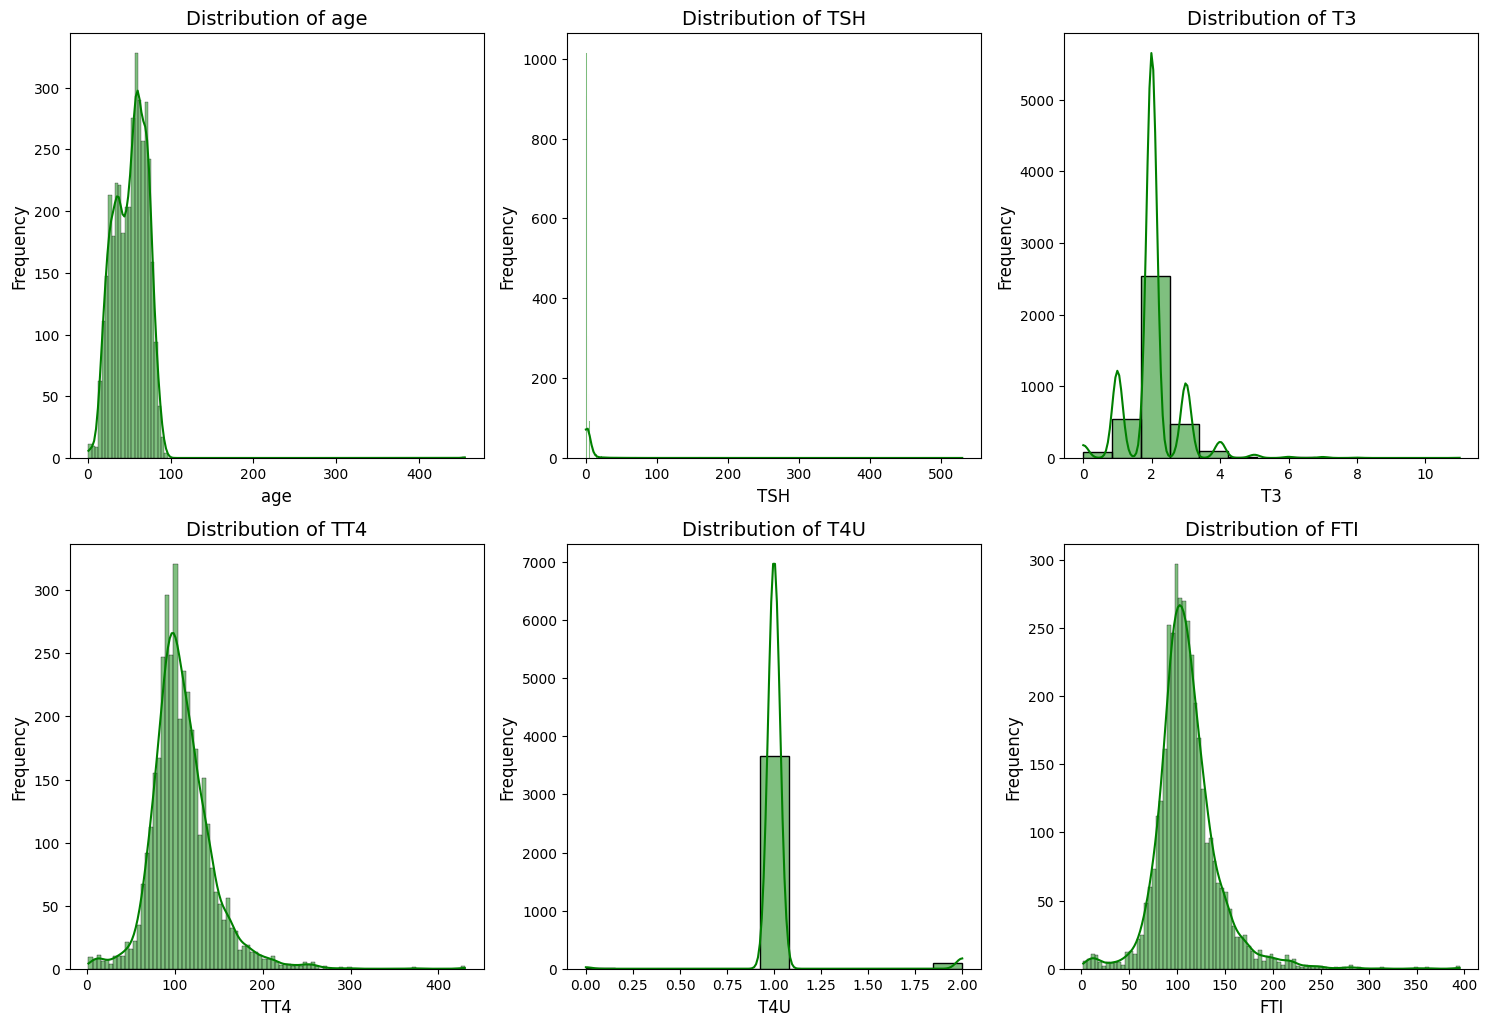

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize=(15, 15), facecolor='white')
plot_number = 1

for column in columns:
    ax = plt.subplot(3, 3, plot_number)
    sns.histplot(new_data[column], kde=True, color='green')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14)
    plot_number += 1

plt.tight_layout()
plt.show()


**The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.**

#### **Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.**


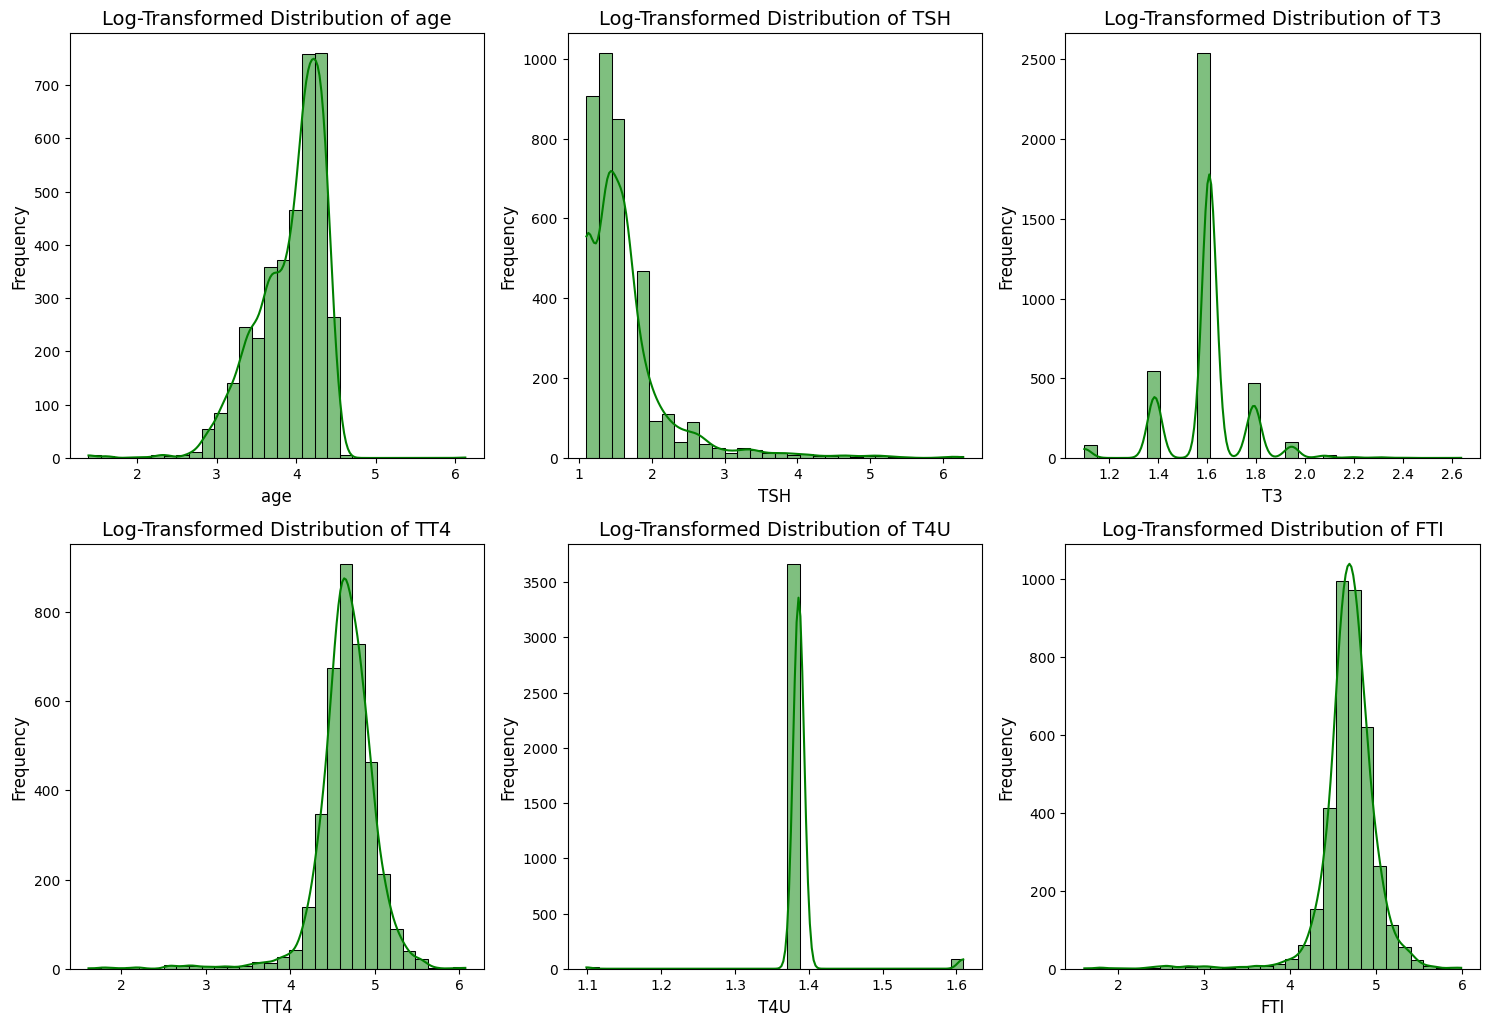

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(15, 15), facecolor='white')

plot_number = 1

for column in columns:
    new_data[column] += 1
    ax = plt.subplot(3, 3, plot_number)
    sns.histplot(np.log(new_data[column]), kde=True, color='green', bins=30)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Log-Transformed Distribution of {column}', fontsize=14)
    plot_number += 1

plt.tight_layout()
plt.show()


**TSH won't give much of information so let's drop this column**

In [51]:
new_data = new_data.drop(['TSH'], axis = 1)

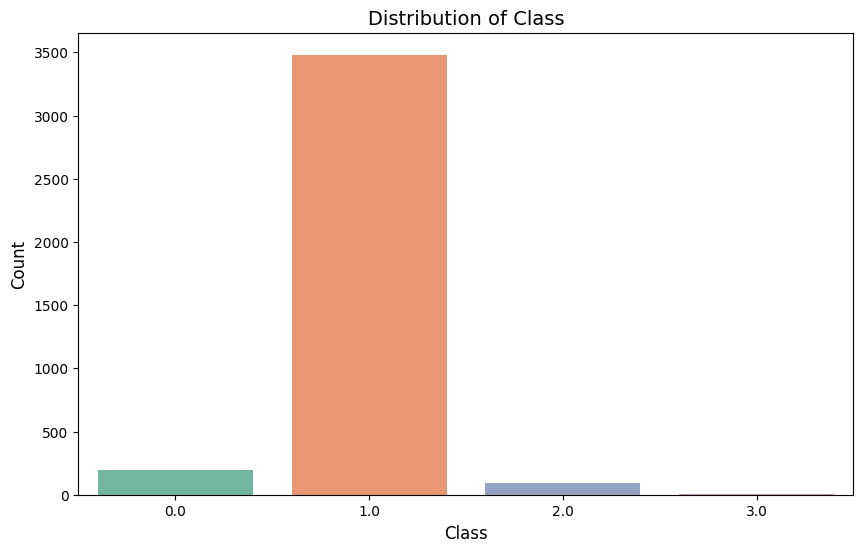

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", n_colors=new_data['Class'].nunique())

plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(data=new_data, x='Class', palette=palette)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Class', fontsize=14)

plt.show()


**We can clerly see that the dataset is highly imbalanced.**

In [54]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']

In [56]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

rdsample = RandomOverSampler()

# Fit the model and resample the data
x_sampled, y_sampled = rdsample.fit_resample(x, y)

In [57]:
#Checking for shape of x_sample
x_sampled.shape

(13924, 24)

In [59]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,128.0,4.0,112.0,1.0,0.0,0.0,0.0
1,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,105.0,4.0,111.0,0.0,0.0,0.0,1.0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,112.0,4.0,123.0,0.0,0.0,0.0,1.0
3,73.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,178.0,4.0,180.0,0.0,0.0,0.0,1.0
4,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,64.0,4.0,73.0,0.0,0.0,1.0,0.0


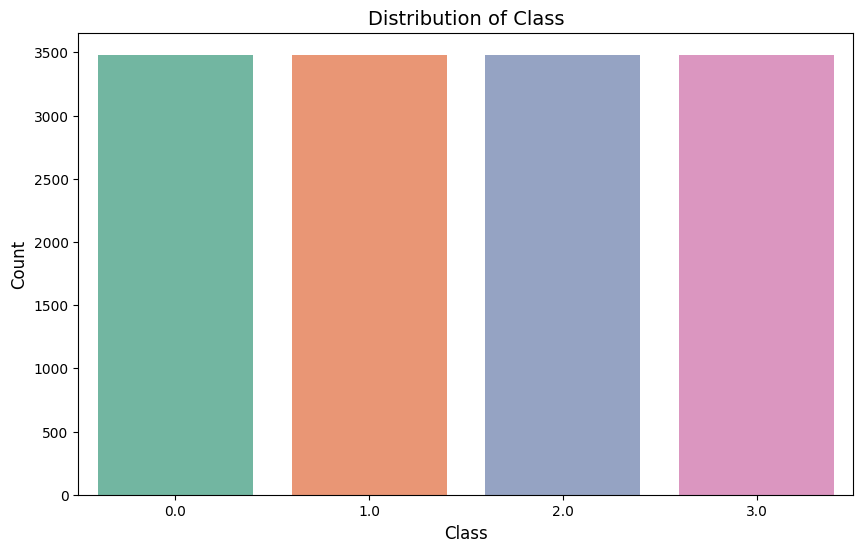

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", n_colors=new_data['Class'].nunique())

plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(data=new_data, x=y_sampled, palette=palette)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Class', fontsize=14)

plt.show()


**Now dataset is balanced.**

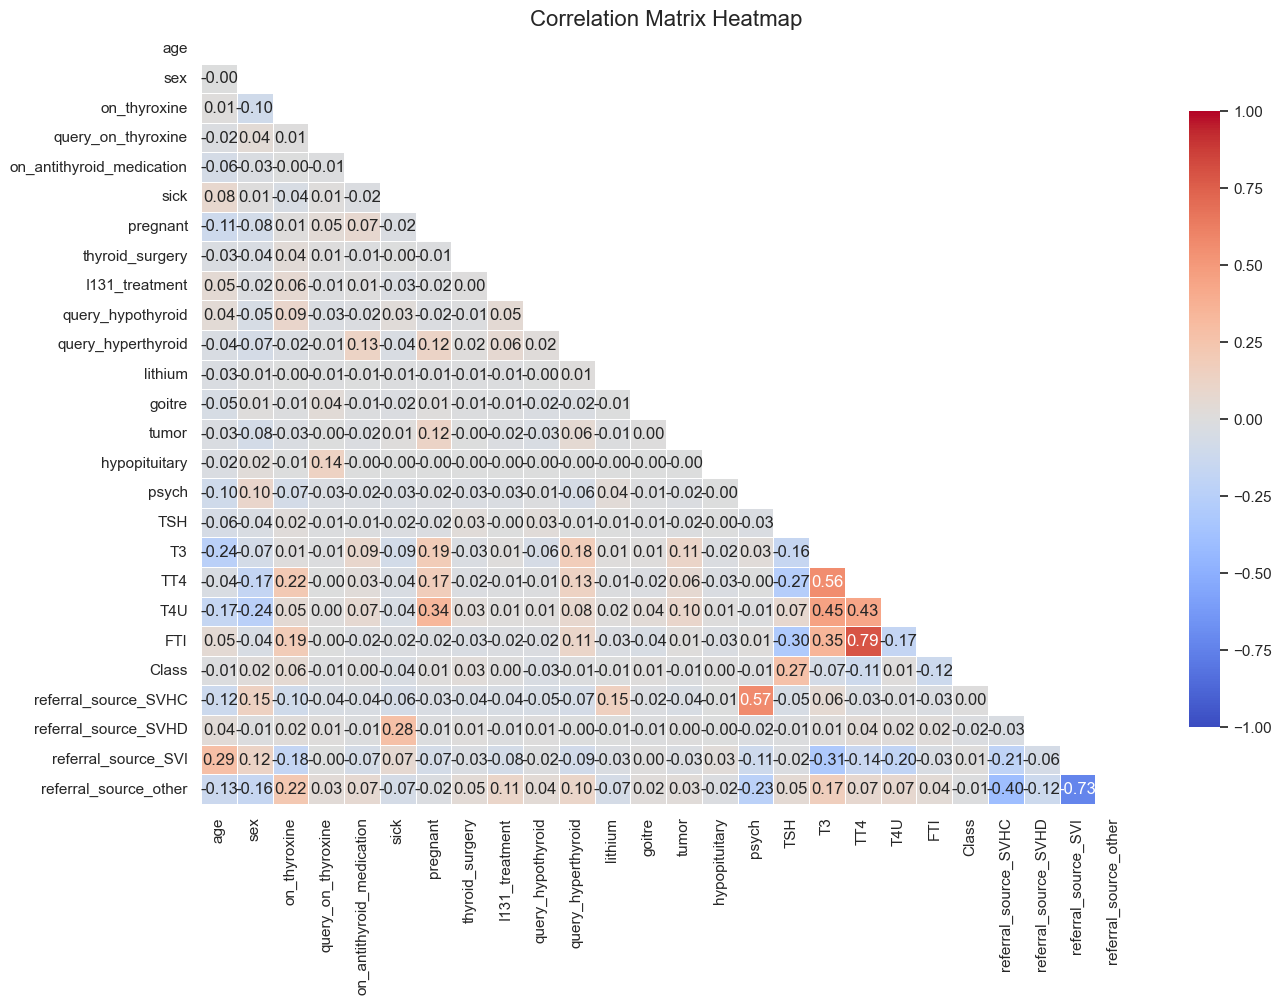

In [62]:
plt.figure(figsize=(15, 10), facecolor='white')
sns.set(style='white')

mask = np.triu(np.ones_like(data.corr(), dtype=bool))

sns.heatmap(
    data.corr(),
    mask=mask,
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [63]:
#Splitting data into train and test for model building

X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=0)

### **Model Selection**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def log_classifier(X_train, X_test, y_train, y_test):
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    log_pred = log_model.predict(X_test)
    cm = confusion_matrix(y_test, log_pred)
    acc = accuracy_score(y_test, log_pred)
    return (acc, f'Logistic Regression:\n'
            f'Accuracy Score: {acc:.2f}\n'
            f'Train Score: {log_model.score(X_train, y_train):.2f}\n'
            f'Test Score: {log_model.score(X_test, y_test):.2f}\n'
            f'Confusion Matrix:\n{cm}')

def svm_classifier(X_train, X_test, y_train, y_test):
    classifier_svm = SVC(kernel='rbf', random_state=0)
    classifier_svm.fit(X_train, y_train)
    svm_pred = classifier_svm.predict(X_test)
    cm = confusion_matrix(y_test, svm_pred)
    acc = accuracy_score(y_test, svm_pred)
    return (acc, f'SVM:\n'
            f'Accuracy Score: {acc:.2f}\n'
            f'Train Score: {classifier_svm.score(X_train, y_train):.2f}\n'
            f'Test Score: {classifier_svm.score(X_test, y_test):.2f}\n'
            f'Confusion Matrix:\n{cm}')

def knn_classifier(X_train, X_test, y_train, y_test):
    classifier_knn = KNeighborsClassifier(metric='minkowski', p=2)
    classifier_knn.fit(X_train, y_train)
    knn_pred = classifier_knn.predict(X_test)
    cm = confusion_matrix(y_test, knn_pred)
    acc = accuracy_score(y_test, knn_pred)
    return (acc, f'KNN:\n'
            f'Accuracy Score: {acc:.2f}\n'
            f'Train Score: {classifier_knn.score(X_train, y_train):.2f}\n'
            f'Test Score: {classifier_knn.score(X_test, y_test):.2f}\n'
            f'Confusion Matrix:\n{cm}')

def tree_classifier(X_train, X_test, y_train, y_test):
    classifier_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier_tree.fit(X_train, y_train)
    dt_pred = classifier_tree.predict(X_test)
    cm = confusion_matrix(y_test, dt_pred)
    acc = accuracy_score(y_test, dt_pred)
    return (acc, f'Decision Tree:\n'
            f'Accuracy Score: {acc:.2f}\n'
            f'Train Score: {classifier_tree.score(X_train, y_train):.2f}\n'
            f'Test Score: {classifier_tree.score(X_test, y_test):.2f}\n'
            f'Confusion Matrix:\n{cm}')

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion='entropy', random_state=0)
    classifier_forest.fit(X_train, y_train)
    rf_pred = classifier_forest.predict(X_test)
    cm = confusion_matrix(y_test, rf_pred)
    acc = accuracy_score(y_test, rf_pred)
    return (acc, f'Random Forest:\n'
            f'Accuracy Score: {acc:.2f}\n'
            f'Train Score: {classifier_forest.score(X_train, y_train):.2f}\n'
            f'Test Score: {classifier_forest.score(X_test, y_test):.2f}\n'
            f'Confusion Matrix:\n{cm}')

def print_score(X_train, X_test, y_train, y_test):
    results = []
    
    acc, result = log_classifier(X_train, X_test, y_train, y_test)
    results.append((acc, result))
    
    acc, result = svm_classifier(X_train, X_test, y_train, y_test)
    results.append((acc, result))
    
    acc, result = knn_classifier(X_train, X_test, y_train, y_test)
    results.append((acc, result))
    
    acc, result = tree_classifier(X_train, X_test, y_train, y_test)
    results.append((acc, result))
    
    acc, result = forest_classifier(X_train, X_test, y_train, y_test)
    results.append((acc, result))
    
    for _, res in results:
        print(res)
        print("-" * 100)
    
    best_model = max(results, key=lambda x: x[0])[1]
    print("Best Model:\n")
    print(best_model)

# Example usage
print_score(X_train, X_test, y_train, y_test)


Logistic Regression:
Accuracy Score: 0.80
Train Score: 0.78
Test Score: 0.80
Confusion Matrix:
[[448 202  18  33]
 [226 412  11   5]
 [ 44  13 642  16]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------
SVM:
Accuracy Score: 0.81
Train Score: 0.80
Test Score: 0.81
Confusion Matrix:
[[515 179   7   0]
 [245 396  10   3]
 [ 17  13 621  64]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------
KNN:
Accuracy Score: 0.96
Train Score: 0.97
Test Score: 0.96
Confusion Matrix:
[[701   0   0   0]
 [114 529   9   2]
 [  0   0 715   0]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------
Decision Tree:
Accuracy Score: 0.98
Train Score: 1.00
Test Score: 0.98
Confusion Matrix:
[[701   0   0   0]
 [ 40 610   4   0]
 [  0   0 715   0]
 [  0   0   0 715]]
-----------------------------------------------

#### **From the above models,it is clear that Random forest are best models for this dataset.**

In [66]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
rf_pred = classifier_forest.predict(X_test)

In [67]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       701
         1.0       1.00      0.96      0.98       654
         2.0       0.99      1.00      0.99       715
         3.0       1.00      1.00      1.00       715

    accuracy                           0.99      2785
   macro avg       0.99      0.99      0.99      2785
weighted avg       0.99      0.99      0.99      2785



Mean Accuracy: 0.99


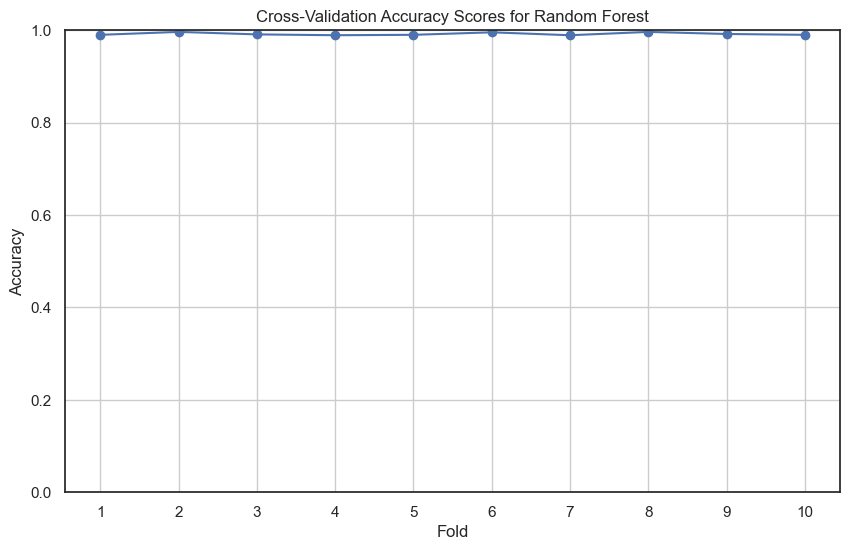

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

classifier_forest = RandomForestClassifier(criterion='entropy', random_state=0)

accuracies = cross_val_score(estimator=classifier_forest, X=X_train, y=y_train, cv=10)

print(f'Mean Accuracy: {accuracies.mean():.2f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores for Random Forest')
plt.xticks(np.arange(1, 11))
plt.ylim(0, 1)
plt.grid(True)

plt.show()


In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier_forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.9920098848116193


In [75]:
import os
import pickle

# Define paths
artifacts_folder_path = os.path.join('..', 'artifacts')
best_model_filename = os.path.join(artifacts_folder_path, 'Thyroid_model.pkl')

# Ensure the artifacts folder exists
os.makedirs(artifacts_folder_path, exist_ok=True)

# Save the model
with open(best_model_filename, 'wb') as file:
    pickle.dump(classifier_forest, file)
print(f"Best model saved as {best_model_filename}")


Best model saved as ..\artifacts\Thyroid_model.pkl


In [76]:
# Load the model
with open(best_model_filename, 'rb') as file:
    random_forest = pickle.load(file)

In [80]:
random_forest

RandomForestClassifier(criterion='entropy', random_state=0)